# Homeworkset 5

Julius Wantenaar 11339055, Sebastiaan Bye 14084880

# Exercise 1 (6 points)

A bacterial population $P$ grows according to the geometric progression

$$P_t = rP_{t-1}$$

Where r is the growth rate. The following population counts $P_1 ,\ldots, P_8$ (in billions) are observed:

In [ ]:
# This imports packages and data

import numpy as np
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import jacfwd, jacrev 
import scipy.linalg as la
import matplotlib.pyplot as plt

data = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )

# (a)
Read chapter 6.6 on Nonlinear Least squares. Use the Gauss-Newton Method to fit the model function $f(t, x_1, x_2) = x_1\!\cdot x_2^t$ to the data. Find estimates for the initial population $P_0=x_1$ and the growth rate $r=x_2$. Implement the Gauss-Newton method yourself (you may use linear algebra functions from `scipy` and `numpy`). 

In [ ]:
# This section implements the Gauss-Netwon method

def f(t, x1, x2):
  return x1*jnp.exp(x2*t)

def fquestion(t, x1, x2):
  return x1 * x2**t

def res(f, t, x, y):
  return y - f(t, x[0], x[1])

def buildJacob(f, t, x):
  arr = np.zeros((len(t), len(x)))
  for column in range(arr.shape[1]):
    func = grad(f, argnums=column+1)
    for row in range(arr.shape[0]):
      arr[row][column] = func(t[row], x[0], x[1])
  return arr*-1

def solver(ittol, ytol, f, t, x, y):
  i = 0
  while (True):
    minr = res(f, t, x, y) * -1
    jacob = buildJacob(f, t, x)
    solve = la.lstsq(jacob, minr)
    xnew = x + solve[0]
    if (ytol > solve[1] or i > ittol):
      break
    x = xnew
    i += 1
  return xnew


In [ ]:
# This tests if the method is implemented correctly by using data from example 6.15 from the book
t = jnp.array([0.0,1.0,2.0,3.0])
y = jnp.array([2.0,0.7,0.3,0.1])

solver(10, 0.0002, f, t, np.array([1.0,0.0]), y)

array([ 1.99500328, -1.00952444])

The result of example 6.15 in Scientific Computing book is $\begin{bmatrix} 1.995 & -1.010 \end{bmatrix}^{T}$. The answer found using the implemented method is $\begin{bmatrix} 1.99500328 & -1.0095244  \end{bmatrix}^{T}$. Thus the function has been correctly implemented.

In [ ]:
# This solves the problem as posed in 1.a

y = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )
t = np.arange(len(y))

ans = solver(10, 0.0002, fquestion, t, np.array([0.0,2.0]), y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


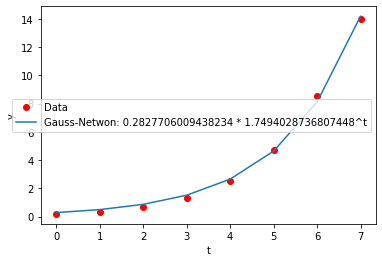

In [ ]:
# This plots the data

plt.plot(t, y, 'ro', label = 'Data')
plt.plot(t,  ans[0] * ans[1]**t, label = f'Gauss-Netwon: {ans[0]} * {ans[1]}^t')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

The plot above shows that Gauss-Netwon is not an appropriate method to estimate the data. It finds the functions $0.2827706 * 1.74940287^{t}$ in 10 iterations. 

# (b)
Let $f$ be a vector valued function $f = [ f_1, \ldots, f_m ]^T$. In weighted least squares one aims to minimize the objective function
$$
  \phi(x) = \frac{1}{2} \sum_{i=1}^m W_{ii} ( y_i - f_i(x)) ^2 , \qquad
  W_{ii} = \frac{1}{\sigma_i^2} , 
$$
where $\sigma_i$ is an estimate of the standard deviation in the data point $y_i$. This is equivalent to the standard least squares problem 
$$
\min_x \frac{1}{2} \| Y - F(x) \|_2^2
$$
with $F_i(x) = \frac{1}{\sigma_i} f(x)$  , $Y_i = \frac{1}{\sigma_i} y_i$. Assume that for each data point $y_i$ in the list above, the estimate for the standard deviation is given by
$$
  \sigma_i = 0.05 y_i .
$$ 
Perform a weighted least squares fit to obtain estimates for $P_0$ and $r$. 

Plot the results of (a) and (b), showing the data points and the fitted curve. Compare the residuals
(the values of $y_i - f_i(x)$) obtained in (a) and (b) and discuss the differences between the results of the weighted and the unweighted optimization.


In [ ]:
def resWeighted(f, t, x, y, w, sigma):
  return y/sigma - f(t, x[0], x[1])/sigma

def buildJacobWeighted(f, t, x, sigma):
  arr = np.zeros((len(t), len(x)))
  for column in range(arr.shape[1]):
    func = grad(f, argnums=column+1)
    for row in range(arr.shape[0]):
      arr[row][column] = func(t[row], x[0], x[1])/sigma[row]
  return arr*-1

def solverWeighted(ittol, ytol, f, t, x, y):
  i = 0
  sigma = y*0.05
  w = 1/(sigma**2)
  while (True):
    minr = resWeighted(f, t, x, y, w, sigma) * -1
    jacob = buildJacobWeighted(f, t, x, sigma)
    solve = la.lstsq(jacob, minr)
    xnew = x + solve[0]
    if (ytol > solve[1] or i > ittol):
      break
    x = xnew
    i += 1
  return xnew

In [ ]:
y = np.array( [0.19, 0.36, 0.69, 1.3, 2.5, 4.7, 8.5, 14] )
t = np.arange(len(y))

ans2 = solverWeighted(10, 0.0002, fquestion, t, np.array([0.0,2.0]), y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


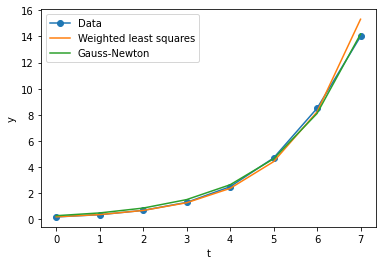

In [ ]:
plt.plot(t, y, label="Data", marker="o")
plt.plot(t,ans2[0] * ans2[1]**t, label="Weighted least squares")
plt.plot(t,ans[0] * ans[1]**t, label="Gauss-Newton")
plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.show()

In [ ]:
def residuals(y, f, x):
  res = []
  t = np.arange(len(y))
  for count, value in enumerate(y):
    res.append(value - f(t[count], x[0], x[1]))

  return res

In [ ]:
resNewton = residuals(y, fquestion, ans)
resLstsq = residuals(y, fquestion, ans2)

print(resNewton)
print(resLstsq)

sumN = 0
sumW = 0 
for i in range(len(resNewton)):
  sumN += np.sqrt(resNewton[i]**2)
  sumW += np.sqrt(resLstsq[i]**2)
print(sumN)
print(sumW)

[-0.09277060094382339, -0.13467970188355577, -0.1753940920266267, -0.21392291145771947, -0.1484610918352538, 0.06677455511176333, 0.3946220923017716, -0.17957140399570193]
[-0.0073659389828565625, -0.007490519884559177, 0.005741698385180127, 0.025927886586359694, 0.12770908829680616, 0.2828527204233211, 0.2753805010939683, -1.3140390438301264]
1.406196449556216
2.0465073974831776


The above plot shows both the Gauss-Netwon approximation and weighted least squared fit. The residuals for each point using Gauss-Netwon approximation can be found in the table bellow. From this table it is obvious that the Gauss-Netwon approach has greater error in fitting the data than weighted least squares.

$$\begin{array}{c||c|c|c|c|c|c|c|c}
\text{Gauss Netwon} & -0.0927& -0.1346& -0.1753& -0.2139& -0.1484& 0.0667& 0.3946& -0.1795 \\
\text{Weighted} & -0.0073& -0.0074& 0.0057& 0.02592& 0.1277& 0.2828& 0.2753& -1.3140
\end{array}
$$

We observe that the weighted Gauss-Newton has decreased residuals for small values of Y, and increased residuals for large values of Y. This gives a more stable standard deviation for the data. However, the sum of residuals is larger for weighted least squares, 2.05 vs 1.41.

# Exercise 2 (3 points)
A triangle has been measured. The measurements, a vector $x \in \mathbb{R}^6$, are as follows:
$$\begin{array}{c|c|c|c|c|c}
x_1 = \alpha 
& x_2 = \beta
& x_3 = \gamma
& x_4 = a
& x_5 = b
& x_6 = c \\ \hline
67.5^{\large\circ}
& 52^{\large\circ}
& 60^{\large\circ}
& 172 \text{m}
& 146 \text{m}
& 165 \text{m}
\end{array} .
$$
Here $\alpha, \beta, \gamma$ are the angles opposite the sides with length $a$, $b$, $c$, respectively.
The measurements $x$ have errors. We would like to correct them so that the new values $\tilde{x} = x + h$ are consistent quantities of a triangle. The have to satisfy:
$$ \tag{*}
\begin{array}{ccc}
\text{Sum of angles:} 
& \;\;\;\;\; & 
\tilde{x}_1 + \tilde{x}_2 + \tilde{x}_3 = 180^{\large\circ}
\\
\text{Sine theorem:}
&&
\tilde{x}_4 \sin(\tilde{x}_2) - \tilde{x}_5 \sin(\tilde{x}_1) = 0
\\
&&
\tilde{x}_5 \sin(\tilde{x}_3) - \tilde{x}_6 \sin(\tilde{x}_2) = 0 .
\end{array}$$


## (a)
Solve the constrained least squares problem $\min_x \| h \|_2^2$ subject to the constraints given by (*).

Use `scipy.optimize.minimize`.

Hint: Don't forget to work in radians!

Check that for the new values also e.g. the cosine theorem $c^2 = a^2 + b^2 - 2 ab \cos(\gamma)$ holds.

In [ ]:
from scipy.optimize import minimize

def f(h):
  t = np.linalg.norm(h,2)
  return t

x = [67.5*np.pi/180, 52*np.pi/180, 60*np.pi/180, 172,146,165]

In [ ]:
# This defines the constraints
def con1(h):
  x = np.array([67.5*np.pi/180, 52*np.pi/180, 60*np.pi/180, 172, 146, 165])
  xtilde = x + h
  return xtilde[0] +xtilde[1] + xtilde[2] - np.pi

def con2(h):
  x = np.array([67.5*np.pi/180, 52*np.pi/180, 60*np.pi/180, 172, 146, 165])
  xtilde = x + h
  return xtilde[3] * np.sin(xtilde[1]) - xtilde[4] * np.sin(xtilde[0])

def con3(h):
  x = np.array([67.5*np.pi/180, 52*np.pi/180, 60*np.pi/180, 172, 146, 165])
  xtilde = x + h
  return xtilde[4] * np.sin(xtilde[2]) - xtilde[5] * np.sin(xtilde[1])

cons = ({'type': 'ineq', 'fun': con1},
        {'type': 'ineq', 'fun': con2},
        {'type': 'ineq', 'fun': con3}
        )

In [ ]:
res = minimize(f, np.array([0,0,0,0,0,0]), constraints = cons)
res

     fun: 0.03714824353125144
     jac: array([-0.31468802, -0.3314353 ,  0.88103305, -0.06428679, -0.06207889,
       -0.08316279])
 message: 'Optimization terminated successfully.'
    nfev: 91
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([-0.01169056, -0.01231392,  0.03273112, -0.00238959, -0.00246045,
       -0.00293259])

In [ ]:
xnew = res.x
xx = xnew+x


print(f'Cosine theorem: {x[3]**2 + x[4]**2 - x[3]* 2 * x[4]*np.cos(x[2])}')
print(f'C squared: {x[5]**2}')
print(f'Difference: {x[5]**2 - (x[3]**2 + x[4]**2 - x[3]* 2 * x[4]*np.cos(x[2]))}\n')

print(f'Cosine theorem: {xx[3]**2 + xx[4]**2 - xx[3]* 2 * xx[4]*np.cos(xx[2])}')
print(f'C squared: {xx[5]**2}')
print(f'Difference: {xx[5]**2 - (xx[3]**2 + xx[4]**2 - xx[3]* 2 * xx[4]*np.cos(xx[2]))}')

Cosine theorem: 25787.999999999993
C squared: 27225
Difference: 1437.0000000000073

Cosine theorem: 27224.032254778886
C squared: 27224.032254866008
Difference: 8.712231647223234e-08


So, the theorem holds for the new values. The difference between the cosine theorem and C-squared is $8.7*10^{-08}$, so it is roughly equal. 

## (b)
You will notice that the corrections will be made mainly to the angles and much less to the lengths of the sides of the triangle. This is because the measurements have not the same absolute errors. While the error in last digit of the sides is about 1, the errors in radians of the angles are about 0.01. Repeat your computation by taking in account with appropriate weighting the difference in measurement errors. Minimize not simply $\| h \|_2^2$ but
$$
  \left\| \begin{bmatrix} 100 h_1 \\ 100 h_2 \\ 100 h_3 \\ h_4 \\ h_5 \\ h_6 \end{bmatrix} \right\|_2^2.$$

In [ ]:
def fnew(h):
  h0 = h[0]*100
  h1 = h[1]*100
  h2 = h[2]*100
  newh = [h0,h1,h2,h[3],h[4],h[5]]
  return np.linalg.norm(newh, 2)
  

In [ ]:
res = minimize(fnew, np.array([0,0,0,0,0,0]), constraints = cons)
res

     fun: 2.5191201209160226
     jac: array([ -7.15109676, -21.95902652,  63.75184232,   0.34716287,
         0.36576027,  -0.53472796])
 message: 'Optimization terminated successfully.'
    nfev: 211
     nit: 23
    njev: 23
  status: 0
 success: True
       x: array([-0.00180145, -0.00553175,  0.01605985,  0.87454497,  0.92139406,
       -1.34704393])

In [ ]:
xnew = res.x
xx = xnew+x


print(f'Cosine theorem: {x[3]**2 + x[4]**2 - x[3]* 2 * x[4]*np.cos(x[2])}')
print(f'C squared: {x[5]**2}')
print(f'Difference: {x[5]**2 - (x[3]**2 + x[4]**2 - x[3]* 2 * x[4]*np.cos(x[2]))}\n')

print(f'Cosine theorem: {xx[3]**2 + xx[4]**2 - xx[3]* 2 * xx[4]*np.cos(xx[2])}')
print(f'C squared: {xx[5]**2}')
print(f'Difference: {xx[5]**2 - (xx[3]**2 + xx[4]**2 - xx[3]* 2 * xx[4]*np.cos(xx[2]))}')

Cosine theorem: 25787.999999999993
C squared: 27225
Difference: 1437.0000000000073

Cosine theorem: 26782.29002310666
C squared: 26782.29002954693
Difference: 6.440270226448774e-06


We see that the error in Cosine theorem and C squared has increased to $6.44 * 10^{-6}$. However, the angles are now affected less than in the unweighted example, which was the goal.  